# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa la librería Numpy y los módulos necesarios de la librería Keras: Sequential, Dense y Flatten.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.layers import Dense, Flatten

2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test. 

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida.

In [3]:
# Matrices de etiquetas para datos de entrenamiento
y_train.shape

(50000, 1)

In [4]:
# Matrices de etiquetas para datos de prueba
y_test.shape

(10000, 1)

In [5]:
# Conjunto de datos en escala de grises para entrenamiento
X_train.shape

(50000, 32, 32, 3)

In [6]:
# Conjunto de datos en escala de grises para pruebas
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 

In [8]:
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [9]:
# one-hot encoding outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

4. Crea un modelo basado en redes neuronales profundas que tenga más de una capa de tipo Dense (Keras). Si es necesario, usa la capa Flatten al principio. Prueba un primer modelo lo más sencillo posible. 

In [10]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape = (32,32,3,)),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(10,activation='softmax')                       
])

5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo, inicialmente, con 20 epochs.

In [11]:
# creamos el optimizador Adam con un valor de learning rate y se lo pasamos a la función compile
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
# añadimos la función fit
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9200 - accuracy: 0.3032
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7919 - accuracy: 0.3554
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7582 - accuracy: 0.3715
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7347 - accuracy: 0.3786
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7132 - accuracy: 0.3857
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6991 - accuracy: 0.3957
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6816 - accuracy: 0.4003
Epoch 8/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6699 - accuracy: 0.4026
Epoch 9/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6548 - accuracy: 0.4082
Epoch 10/20
1563/1563 [==============================] - 9s 6ms/step - los

6. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.

In [13]:
model1 = keras.Sequential([
   keras.layers.Flatten(input_shape = (32,32,3,)),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(320, activation='relu'),
   keras.layers.Dense(320, activation='relu'),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(10,activation='softmax')                       
])

In [14]:
# creamos el optimizador Adam con un valor de learning rate y se lo pasamos a la función compile
opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
# añadimos la función fit
model1.fit(X_train, y_train, epochs = 30)

Epoch 1/30
1563/1563 [==============================] - 40s 25ms/step - loss: 1.8696 - accuracy: 0.3197
Epoch 2/30
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6954 - accuracy: 0.3886
Epoch 3/30
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6190 - accuracy: 0.4171
Epoch 4/30
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5673 - accuracy: 0.4362
Epoch 5/30
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5248 - accuracy: 0.4524
Epoch 6/30
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4903 - accuracy: 0.4642
Epoch 7/30
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4603 - accuracy: 0.4725
Epoch 8/30
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4367 - accuracy: 0.4851
Epoch 9/30
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4119 - accuracy: 0.4926
Epoch 10/30
1563/1563 [==============================] - 39s 25m

Podemos observar una **mejor precisión en este entrenamiento** respecto al original, con cerca de 20 puntos de diferencia.

7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

In [16]:
print("Evaluando conjunto de datos de test")
# model.evaluate(X_test, y_test)
result= model1.evaluate(X_test, y_test)
print("Test Loss, Test Accuracy o Precisión: ", result)

Evaluando conjunto de datos de test
313/313 [==============================] - 2s 5ms/step - loss: 1.8211 - accuracy: 0.4662
Test Loss, Test Accuracy o Precisión:  [1.8211373090744019, 0.46619999408721924]


Tras evaluar, se puede observar como ha bajado el nivel de precisión de forma sensible.

8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. 

313/313 [==============================] - 2s 5ms/step


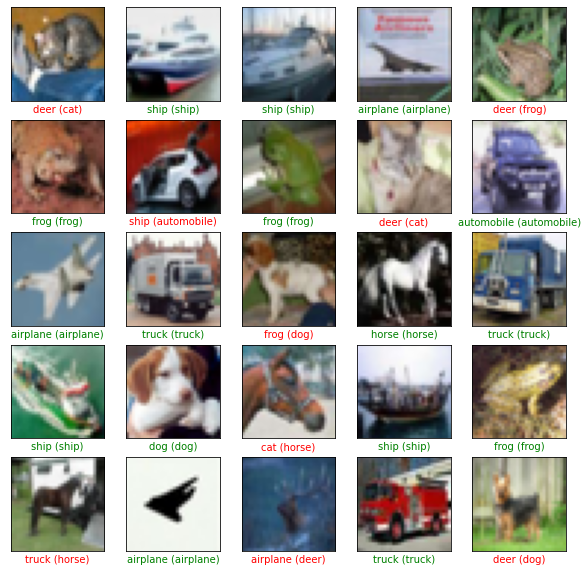

In [17]:
predictions = model1.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()], 
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)

Gracias al condicional incluido en el script, se pueden observar de forma directa los resultados de cada predicción.